In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
df = pd.read_csv('/home/sanjay/Desktop/crkt/cricketdata.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [37]:
team_abbr = {
    'Chennai Super Kings': 'CSK',
    'Royal Challengers Bangalore': 'RCB',
    'Kolkata Knight Riders': 'KKR',
    'Mumbai Indians': 'MI',
    'Delhi Daredevils': 'DD',
    'Deccan Chargers': 'DC',
    'Rajasthan Royals': 'RR',
    'Kings XI Punjab': 'KXIP'
    
}

In [38]:
abbreviation_to_full = {v: k for k, v in team_abbr.items()}


In [39]:
df['team1'] = df['team1'].map(team_abbr).fillna(df['team1'])
df['team2'] = df['team2'].map(team_abbr).fillna(df['team2'])
df['toss_winner'] = df['toss_winner'].map(team_abbr).fillna(df['toss_winner'])
df['winner'] = df['winner'].map(team_abbr).fillna(df['winner'])


In [40]:

df.replace('', np.nan, inplace=True)
df.dropna(subset=['team1', 'team2', 'toss_winner', 'winner'], inplace=True)

In [41]:
le = LabelEncoder()

In [42]:
df['team1'] = le.fit_transform(df['team1'])
df['team2'] = le.fit_transform(df['team2'])
df['toss_winner'] = le.fit_transform(df['toss_winner'])
df['winner'] = le.fit_transform(df['winner'])


In [43]:

X = df[['team1', 'team2', 'toss_winner']]  # Features
y = df['winner']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

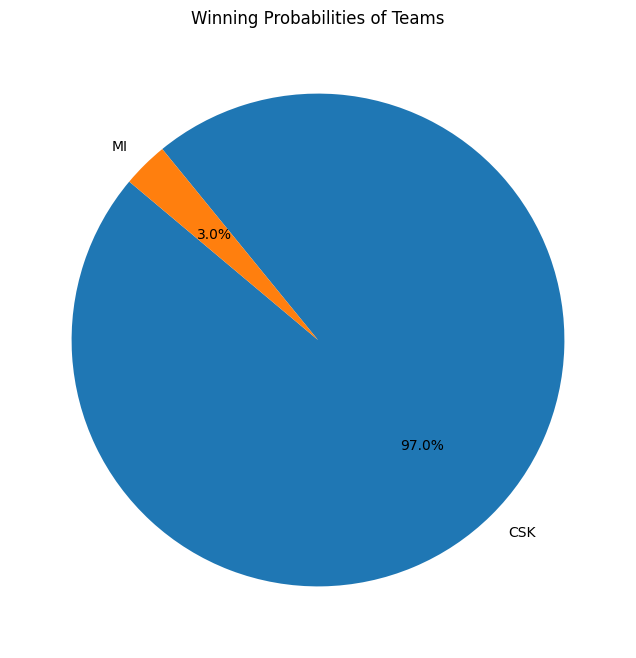

In [ ]:
class MatchOutcomePredictor:
    def __init__(self, master):
        self.master = master
        master.title("Cricket Match Outcome Predictor")

        # Create input fields
        self.team1_label = tk.Label(master, text="Team 1 (abbreviation):")
        self.team1_label.grid(row=0, column=0)
        self.team1_entry = tk.Entry(master)
        self.team1_entry.grid(row=0, column=1)

        self.team2_label = tk.Label(master, text="Team 2 (abbreviation):")
        self.team2_label.grid(row=1, column=0)
        self.team2_entry = tk.Entry(master)
        self.team2_entry.grid(row=1, column=1)

        self.toss_winner_label = tk.Label(master, text="Toss Winner (abbreviation):")
        self.toss_winner_label.grid(row=2, column=0)
        self.toss_winner_entry = tk.Entry(master)
        self.toss_winner_entry.grid(row=2, column=1)

        self.predict_button = tk.Button(master, text="Predict", command=self.predict_match_outcome)
        self.predict_button.grid(row=3, column=0, columnspan=2)

        self.output_label = tk.Label(master, text="Prediction Results:")
        self.output_label.grid(row=4, column=0)
        self.output_text = tk.Text(master, height=5, width=40)
        self.output_text.grid(row=5, column=0, columnspan=2)

    def predict_match_outcome(self):
        try:
            team1_abbr = self.team1_entry.get().upper()
            team2_abbr = self.team2_entry.get().upper()
            toss_winner_abbr = self.toss_winner_entry.get().upper()

            if team1_abbr not in team_abbr.values() or team2_abbr not in team_abbr.values() or toss_winner_abbr not in team_abbr.values():
                raise ValueError("One or more input values are not recognized. Use valid team abbreviations.")

            team1_encoded = le.transform([team1_abbr])[0]
            team2_encoded = le.transform([team2_abbr])[0]
            toss_winner_encoded = le.transform([toss_winner_abbr])[0]

            input_data = np.array([[team1_encoded, team2_encoded, toss_winner_encoded]])

            prob_logreg = logreg.predict_proba(input_data)[0]
            prob_dtree = dtree.predict_proba(input_data)[0]
            prob_rforest = rforest.predict_proba(input_data)[0]

            team1_win_prob = np.mean([
                prob_logreg[team1_encoded],
                prob_dtree[team1_encoded],
                prob_rforest[team1_encoded]
            ])
            team2_win_prob = np.mean([
                prob_logreg[team2_encoded],
                prob_dtree[team2_encoded],
                prob_rforest[team2_encoded]
            ])

            total_prob = team1_win_prob + team2_win_prob
            team1_win_prob /= total_prob
            team2_win_prob /= total_prob

            labels = [team1_abbr, team2_abbr]
            probabilities = [team1_win_prob, team2_win_prob]
            plt.figure(figsize=(8, 8))
            plt.pie(probabilities, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.title('Winning Probabilities of Teams')
            plt.show()

            self.output_text.delete(1.0, tk.END)
            self.output_text.insert(tk.END, f"{team1_abbr} Winning Probability: {team1_win_prob:.2f}\n")
            self.output_text.insert(tk.END, f"{team2_abbr} Winning Probability: {team2_win_prob:.2f}\n")

        except ValueError as e:
            messagebox.showerror("Error", f"ValueError: {str(e)}")
        except KeyError as e:
            messagebox.showerror("Error", f"KeyError: {str(e)}")
        except Exception as e:
            messagebox.showerror("Error", f"An unexpected error occurred: {str(e)}")

root = tk.Tk()
app = MatchOutcomePredictor(root)
root.mainloop()